## Impact of Immigration on Rental Prices

This analysis aims to investigate the following questions:

1. How does the increase in immigration impact rental prices in major Canadian cities?

2. Is there a correlation between immigration rates and changes in rental prices?

#### Data Sources

    Canada Mortgage and Housing Corporation, average rents for areas with a population of 10,000 and over 

    Statistics Canada. Table 17-10-0040-01  Estimates of the components of international migration, quarterly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load immigration data
immigration_data_df = pd.read_csv('immigration_cleaned.csv')


In [3]:
print(immigration_data_df.head())

   REF_DATE                                 province  Immigrants  \
0      1946                                  Alberta      5771.0   
1      1946                         British Columbia      8619.0   
2      1946                                 Manitoba      4615.0   
3      1946                            New Brunswick      3465.0   
4      1946  Northwest Territories including Nunavut        21.0   

   Net emigration  Net non-permanent residents  
0             NaN                          NaN  
1             NaN                          NaN  
2             NaN                          NaN  
3             NaN                          NaN  
4             NaN                          NaN  


In [4]:
# Load rental prices data
rental_prices_df = pd.read_csv('average_rent_data_cleaned.csv')

# Ensure REF_DATE is in datetime format and extract the year
#rental_prices_df['REF_DATE'] = pd.to_datetime(rental_prices_df['REF_DATE'])

#rental_prices_df['Year'] = rental_prices_df['REF_DATE'].dt.year


In [14]:
print(rental_prices_df.tail())

     REF_DATE              province  rent_amount
476      2023        Ontario/Quebec  1349.454545
477      2023  Prince Edward Island   896.842105
478      2023                Quebec   616.808219
479      2023          Saskatchewan   938.369048
480      2023                 Yukon          NaN


In [6]:
# Group rental prices data by Year and province
rental_prices_grouped = rental_prices_df.groupby(['REF_DATE', 'province']).sum(numeric_only=True).reset_index()

# Group immigration data by Year and province
immigration_data_grouped = immigration_data_df.groupby(['REF_DATE', 'province']).sum(numeric_only=True).reset_index()

In [7]:
# Merge the grouped dataframes on 'Year' and 'province'
merged_df = pd.merge(rental_prices_grouped, immigration_data_grouped, on=['REF_DATE', 'province'], how='inner')

# Save the merged DataFrame
merged_df.to_csv('immigration_rental_data', index=False)

print("Data has been grouped, merged, and saved successfully.")

Data has been grouped, merged, and saved successfully.


In [8]:
print(merged_df.head())

   REF_DATE                   province  rent_amount  Immigrants  \
0      1987                    Alberta   382.000000     11974.0   
1      1987           British Columbia   272.740741     18898.0   
2      1987                   Manitoba   378.461538      4782.0   
3      1987              New Brunswick   338.529412       641.0   
4      1987  Newfoundland and Labrador   393.500000       455.0   

   Net emigration  Net non-permanent residents  
0          4675.0                       4622.0  
1          3668.0                       5848.0  
2          1281.0                         80.0  
3           565.0                        146.0  
4           242.0                        260.0  


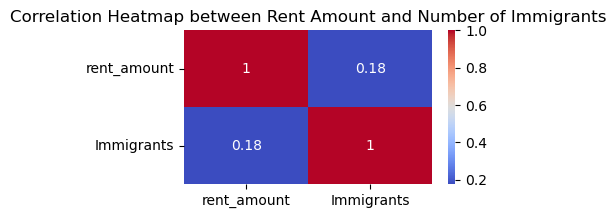

In [13]:
plt.figure(figsize=(4, 2))
correlation_matrix = merged_df[['rent_amount', 'Immigrants']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Rent Amount and Number of Immigrants')
plt.show()

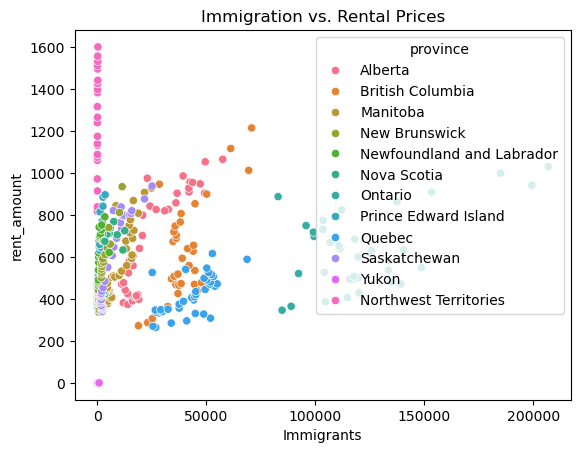

In [10]:
# Scatter plot to visualize the relationship between immigration and rental prices
sns.scatterplot(data=merged_df, x='Immigrants', y='rent_amount', hue='province')
plt.title('Immigration vs. Rental Prices')
plt.show()